**LAB TASK 2**

**Name :** Muhammad Saad Ullah Khan Haidri

**Reg No :** 2022420

**New Game** : Robort Navigation Game

**Overview**

**1** The robot starts at position (0,0) on the grid.

**2** The goal position (destination) will be specified by the user.

**3** The grid contains obstacles ('X') that the robot must avoid.

**4** The robot will navigate the grid using the A* algorithm to find the shortest path to the goal.

**Modifications to the Code:**

**1** Replace the treasure with a goal position specified by the user.

**2** Update variable names and comments to reflect the new scenario





In [2]:
import heapq  # Importing heapq to implement the priority queue for A* algorithm
import random  # Importing random to place obstacles randomly
import math    # Importing math for distance calculations

# Function to create a grid based on user-defined size and place the goal at a user-specified position
def create_grid(size, goal_position):
    grid = [[' ' for _ in range(size)] for _ in range(size)]  # Create an empty grid filled with spaces
    grid[0][0] = 'R'  # 'R' marks the robot's starting point at the top-left corner (0,0)

    # Place the goal ('G') at the user-specified position
    goal_x, goal_y = goal_position
    grid[goal_x][goal_y] = 'G'  # Place the goal 'G'

    return grid

# Function to add random obstacles to the grid
def add_obstacles(grid, num_obstacles):
    size = len(grid)
    for _ in range(num_obstacles):
        obstacle_x, obstacle_y = random.randint(0, size-1), random.randint(0, size-1)
        # Ensure obstacles are not placed on the start 'R' or goal 'G'
        while grid[obstacle_x][obstacle_y] in ['R', 'G']:
            obstacle_x, obstacle_y = random.randint(0, size-1), random.randint(0, size-1)
        grid[obstacle_x][obstacle_y] = 'X'  # Place the obstacle 'X'
    return grid

# Function to check if a position is valid (within bounds and not blocked by an obstacle)
def is_valid_position(grid, x, y):
    size = len(grid)
    return 0 <= x < size and 0 <= y < size and grid[x][y] != 'X'  # Return true if position is valid

# Heuristic function: Calculates the straight-line (Euclidean) distance between the current node and the goal
def heuristic(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

# A* algorithm function to find the shortest path
def a_star(grid, start, goal):
    size = len(grid)
    # Priority queue to keep track of nodes to explore (using heapq)
    open_list = []
    heapq.heappush(open_list, (0, start))  # Add the start node with priority 0

    # Dictionaries to store the cost to reach each node and the path taken
    g_score = {start: 0}  # Cost from start to current node
    parent = {start: None}  # To reconstruct the path

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Possible directions: up, down, left, right

    while open_list:
        _, current = heapq.heappop(open_list)  # Get the node with the lowest f(n)

        # If we reach the goal, stop the search
        if current == goal:
            break

        # Explore neighboring positions (up, down, left, right)
        for direction in directions:
            next_x = current[0] + direction[0]  # Calculate next x-coordinate
            next_y = current[1] + direction[1]  # Calculate next y-coordinate
            next_state = (next_x, next_y)  # Form the next state (position)

            # Check if the next position is valid
            if is_valid_position(grid, next_x, next_y):
                tentative_g_score = g_score[current] + 1  # Cost of moving to the next position

                # If the next state has not been explored or we found a cheaper path to it
                if next_state not in g_score or tentative_g_score < g_score[next_state]:
                    g_score[next_state] = tentative_g_score  # Update the cost to reach this state
                    f_score = tentative_g_score + heuristic(next_state, goal)  # Calculate the total cost f(n)
                    heapq.heappush(open_list, (f_score, next_state))  # Add the state to the open list
                    parent[next_state] = current  # Set the current state as the parent of the next state

    # Reconstruct the path from start to goal
    path = []
    current = goal  # Start from the goal and work backwards
    while current is not None:
        path.append(current)  # Add current position to the path
        current = parent[current]  # Move to the parent of the current state
    path.reverse()  # Reverse the path to start from the beginning (start to goal)

    return path

# Function to print the grid with lines and the path marked
def print_grid_with_path(grid, path):
    grid_with_path = [row.copy() for row in grid]  # Copy the original grid to preserve it
    for (x, y) in path:
        if grid_with_path[x][y] not in ['R', 'G']:  # Don't overwrite start 'R' and goal 'G'
            grid_with_path[x][y] = '*'  # Mark the path with '*'

    # Print the grid with lines to separate cells clearly
    print("\nGrid with Path:")
    print('-' * (len(grid_with_path) * 4 + 1))  # Print top border line
    for row in grid_with_path:
        print('| ' + ' | '.join(row) + ' |')  # Print row with borders between cells
        print('-' * (len(grid_with_path) * 4 + 1))  # Print horizontal line after each row

# Main function to play the game
def robot_navigation():
    # Ask the user for grid size, number of obstacles, and goal position
    size = int(input("Enter the grid size (e.g., 6 for a 6x6 grid): "))
    num_obstacles = int(input(f"Enter the number of obstacles (less than {size * size - 2}): "))  # Make sure obstacles are less than available spaces

    # Get the goal position from the user
    goal_x = int(input("Enter the goal x-coordinate: "))
    goal_y = int(input("Enter the goal y-coordinate: "))

    if not (0 <= goal_x < size and 0 <= goal_y < size):
        print("Invalid goal position. It must be within the grid bounds.")
        return

    # Create the grid and place the goal at the user-specified position
    grid = create_grid(size, (goal_x, goal_y))

    # Add random obstacles to the grid
    grid = add_obstacles(grid, num_obstacles)

    # Print the initial grid
    print("\nInitial Grid:")
    print_grid_with_path(grid, [])  # Empty path initially

    # Start the search using A* algorithm
    print("\nSearching for the goal using A* algorithm...\n")
    path = a_star(grid, (0, 0), (goal_x, goal_y))  # Perform A* search

    # Print the final grid with the path marked
    print("\nPath to the Goal:")
    print_grid_with_path(grid, path)  # Show the path to the goal

# Run the game
robot_navigation()


Enter the grid size (e.g., 6 for a 6x6 grid): 6
Enter the number of obstacles (less than 34): 10
Enter the goal x-coordinate: 4
Enter the goal y-coordinate: 4

Initial Grid:

Grid with Path:
-------------------------
| R |   |   |   |   | X |
-------------------------
|   |   | X | X |   |   |
-------------------------
|   | X |   | X |   |   |
-------------------------
| X | X |   |   |   |   |
-------------------------
|   |   |   | X | G |   |
-------------------------
|   | X |   | X |   |   |
-------------------------

Searching for the goal using A* algorithm...


Path to the Goal:

Grid with Path:
-------------------------
| R | * | * | * | * | X |
-------------------------
|   |   | X | X | * |   |
-------------------------
|   | X |   | X | * |   |
-------------------------
| X | X |   |   | * |   |
-------------------------
|   |   |   | X | G |   |
-------------------------
|   | X |   | X |   |   |
-------------------------


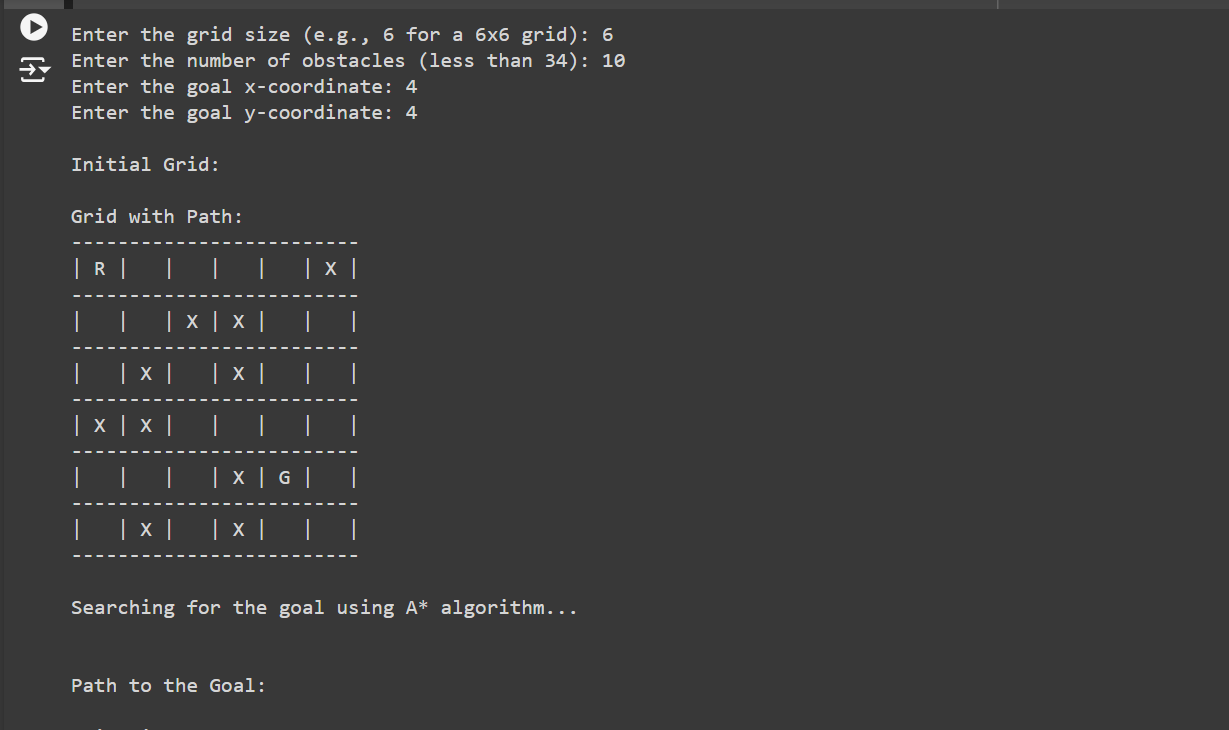